***Интерполяция с помощью полинома Лагранжа***

In [132]:
from IPython.display import Latex
from math import sin,cos, atan, pi
import pandas as pd
from matplotlib import pyplot as plt

Поиск машинного нуля

In [133]:
def machine_zero():
    if hasattr(machine_zero, 'zero'):
        return machine_zero.zero
    base = 1.0
    zero = base
    while base + zero / 2 > base:
        zero /= 2
    setattr(machine_zero, 'zero', zero)
    return zero

In [134]:
machine_zero()

2.220446049250313e-16

**Вычисление полинома ньютона:**

In [135]:
%%latex
\begin{align}
Ln = \sum_{i=0}^{n}f_{i}*\prod_{j=0, j\not\equiv i}^{n}*\frac{x - x_{j}}{x_{i} - x_{j}}
\end{align}

<IPython.core.display.Latex object>

Вычисление полинома Лагранжа для заданного массива функций для интерполяции

In [136]:
def product(i, x_arr, x):
    product = 1.0
    for j, x_j in enumerate(x_arr):
        if j != i:
            product *= (x - x_j) / (x_arr[i] - x_j)
    return product

def lagrange_poly(f_arr, x_arr, x):
    """
    :param f_arr: Массив значений функции для интерполяции
    :param x_arr: сетка значений аргумента функции
    :param x: Аргумент интерполяционного полинома
    """
    assert isinstance(f_arr, (list, tuple))
    assert isinstance(x_arr, (list, tuple))
    assert isinstance(x, float)
    assert len(x_arr) == len(f_arr)
    Ln = 0
    for i, f in f_arr:
        prod = product(i, x_arr, x)
        Ln += f * prod
    return Ln

Вычисление полинома Ньютона для заданной функции и сетки.

In [137]:
def lagrange_poly_by_func(f, x_arr, x):
    """
    :param f: Известная функция для интерполяции
    :param x_arr: сетка значений аргумента функции
    :param x: Аргумент интерполяционного полинома
    """
    assert isinstance(x_arr, (list, tuple))
    assert isinstance(x, float)
    assert callable(f)
    Ln = 0
    for i, x_i in enumerate(x_arr):
        prod = product(i, x_arr, x)
        Ln += f(x_i) * prod
    return Ln

**Функция, заданная для численной интерполяции:**

In [138]:
%%latex
\begin{align}
sin^3(\frac{x}{3})*arctan(x), x\in [0,10]
\end{align}

<IPython.core.display.Latex object>

In [139]:
def f(x):
    return sin(x/3) ** 3 * atan(x)

**Сетка для интерполяции**

In [140]:
def get_interpolation_net(a,b, count):
    return [a + (b - a) * i / count for i in range(count+1)]

In [141]:
def get_check_net(interpolation_net):
    check_net = []
    for i, _ in enumerate(interpolation_net):
        if i == len(interpolation_net) - 1:
            break
        check_net.append(interpolation_net[i] + (interpolation_net[i+1] - interpolation_net[i]) / 2)
    return check_net

In [142]:
def get_interpolation_result(f, interpol_net, check_net):
    common_net = sorted(interpol_net + check_net)
    interpolations = [lagrange_poly_by_func(f, interpol_net, x) for x in common_net]
    error = [f(common_net[i]) - interpolations[i] for i in range(len(common_net))]
    
    f_x = [f(x) for x in common_net]
    
    output = pd.DataFrame(data={'x': common_net, 'f(x)': f_x, 'Ln': interpolations, 'delta(Ln)': error}, columns=[ 'x', 'f(x)','Ln', 'delta(Ln)'])
    return output

Интерполяция для сетки шагом 1 от 0 до 10, для значений от 0 до 10 с шагом 0.5

In [154]:
interpol_net = get_interpolation_net(0, 10, 100)
normal_net_inter = get_interpolation_result(f, interpol_net, get_check_net(interpol_net))
normal_net_inter

,x,f(x),Ln,delta(Ln)
0,0.00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.05,2.312567e-07,-8.952505e+10,8.952505e+10
2,0.10,3.689381e-06,3.689381e-06,0.000000e+00
3,0.15,1.858799e-05,-1.929166e+09,1.929166e+09
4,0.20,5.835773e-05,5.835773e-05,0.000000e+00
5,0.25,1.412785e-04,3.371734e+07,-3.371734e+07
6,0.30,2.900027e-04,2.900027e-04,0.000000e+00
7,0.35,5.309994e-04,-1.466462e+05,1.466462e+05
8,0.40,8.939546e-04,8.939546e-04,0.000000e+00
9,0.45,1.411155e-03,2.382527e+05,-2.382527e+05


**Построение сетки по корням полинома Чебышева**

*Полином чебышева имеет вид:*

In [155]:
%%latex
\begin{align}
P_{n} = cos(n * arccos(x))
\end{align}

<IPython.core.display.Latex object>

*Тогда корни этого многочлена будут иметь вид:*

In [156]:
%%latex
\begin{align}
x_{k} = cos(\frac{(2k+1)*\pi}{2n}), (k=0,1,...,n-1)
\end{align}

<IPython.core.display.Latex object>

In [157]:
def chebyshev_poly(n):
    return list(sorted([cos((2*k+1)*pi/2/n) for k in range(n)]))

In [158]:
%%latex
\begin{align}
Узлы \space сетки \space x_{k}\in[-1,1]. Следовательно, чтобы \space получить \space сетку \newline на \space произвольном \space интервале: \space  t_{k}\in[a,b] \space 
t_{k} \space примет \space вид: t_{k} = a + (1 + x_{k}) * \frac{(b - a)}{2}
\end{align}

<IPython.core.display.Latex object>

In [159]:
def chebyshev_poly_range(a,b,n):
    return [a + (1 + x) * (b - a) / 2 for x in chebyshev_poly(n)]

In [160]:
chebyshev_net = chebyshev_poly_range(0,10,100)
chebyshev_result = get_interpolation_result(f, chebyshev_net, get_check_net(chebyshev_net))
chebyshev_result

,x,f(x),Ln,delta(Ln)
0,0.000617,5.361910e-15,5.361910e-15,0.000000e+00
1,0.003084,3.349198e-12,3.349055e-12,1.424619e-16
2,0.005551,3.515593e-11,3.515593e-11,0.000000e+00
3,0.010482,4.470856e-10,4.470857e-10,-1.247740e-16
4,0.015413,2.090173e-09,2.090173e-09,0.000000e+00
5,0.022804,1.001414e-08,1.001414e-08,9.299734e-17
6,0.030195,3.077764e-08,3.077764e-08,0.000000e+00
7,0.040038,9.512078e-08,9.512078e-08,-1.858502e-16
8,0.049882,2.290771e-07,2.290771e-07,0.000000e+00
9,0.062168,5.523816e-07,5.523816e-07,1.728219e-16


Построение графиков

In [161]:
def get_interpolation_plot(f, interpol_net, check_net):
    common_net =check_net
    interpolations = [lagrange_poly_by_func(f, interpol_net, x) for x in common_net]
    error = [f(common_net[i]) - interpolations[i] for i in range(len(common_net))]
    
    f_x = [f(x) for x in common_net]
    
    output = pd.DataFrame(data={'x': common_net, 'f(x)': f_x, 'Ln': interpolations, 'delta(Ln)': error}, columns=[ 'x', 'f(x)','Ln', 'delta(Ln)'])
    return output

In [162]:
plot_net = [i/100 for i in range(1000)]
normal_net_plot = get_interpolation_plot(f, interpol_net, plot_net)
chebyshev_net_plot = get_interpolation_plot(f, chebyshev_net, plot_net)

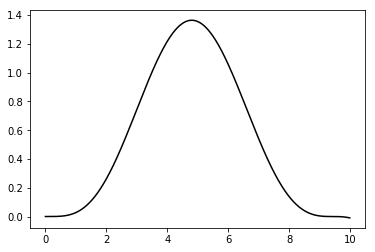

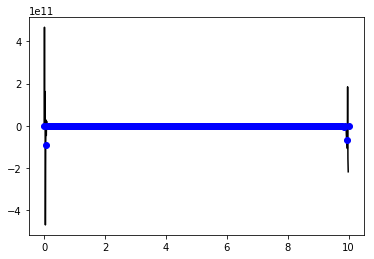

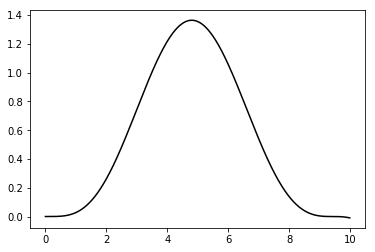

In [168]:
plt.figure(1)
plt.plot(
    normal_net_plot['x'],
    normal_net_plot['f(x)'],
    'k')
plt.figure(2)
plt.plot(
    normal_net_plot['x'],
    normal_net_plot['Ln'],
    'k',
    normal_net_inter['x'],
    normal_net_inter['Ln'],
    'bo'
)
plt.figure(4)
plt.plot(
    chebyshev_net_plot['x'],
    chebyshev_net_plot['Ln'],
    'k'
)

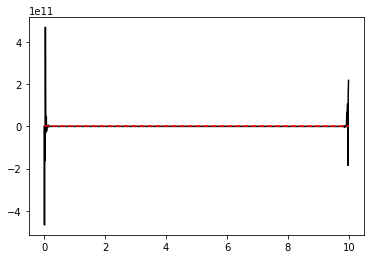

In [164]:
plt.plot(
    normal_net_plot['x'],
    normal_net_plot['delta(Ln)'],
    'k',
    normal_net_plot['x'],
    chebyshev_net_plot['delta(Ln)'],
    'r--'
)